# Visualizing Earnings Based On College Majors

## Introduction
In this project we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012 in USA. The original data on job outcomes was released by [_American Community Survey_](https://www.census.gov/programs-surveys/acs/), and cleaned and released by _FiveThirtyEight_.

## Dataset
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- __Rank__ - Rank by median earnings (the dataset is ordered by this column).
- __Major_code__ - Major code.
- __Major__ - Major description.
- __Major_category__ - Category of major.
- __Total__ - Total number of people with major.
- __Sample_size__ - Sample size (unweighted) of full-time.
- __Men__ - Male graduates.
- __Women__ - Female graduates.
- __ShareWomen__ - Women as share of total.
- __Employed__ - Number employed.
- __Median__ - Median salary of full-time, year-round workers.
- __Low_wage_jobs__ - Number in low-wage service jobs.
- __Full_time__ - Number employed 35 hours or more.
- __Part_time__ - Number employed less than 35 hours.


Using visualizations, we can start to explore questions from the dataset like:
 - Do students in more popular majors make more money?
 - How many majors are predominantly male? Predominantly female?
 - Which category of majors have the most students?

Lets load the libraries, remove null values and explore the data!

In [1]:
import pandas as pd
import matplotlib as mp
%matplotlib inline
recent_grads=pd.read_csv('recent-grads.csv')
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [2]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [4]:
raw_data_count=recent_grads.shape[0]
print(raw_data_count)

173


In [5]:
recent_grads=recent_grads.dropna()
cleaned_data_count=recent_grads.shape[0]
print("Total of removed rows")
print(raw_data_count-cleaned_data_count)

Total of removed rows
1


## Scatter plots
We can start the analysis with some scatter plots in order to try to answer the following questions:
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

(20000, 120000)

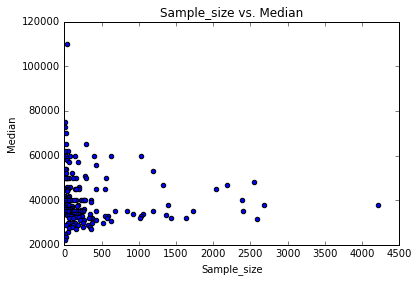

In [6]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample_size vs. Median')
ax.set_xlim(0,4500)
ax.set_ylim(20000,120000)

(-0.0001, 0.2)

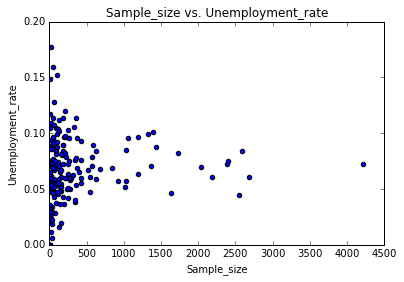

In [7]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Sample_size vs. Unemployment_rate')
ax.set_xlim(0,4500)
ax.set_ylim(-0.0001, 0.2)

(20000, 120000)

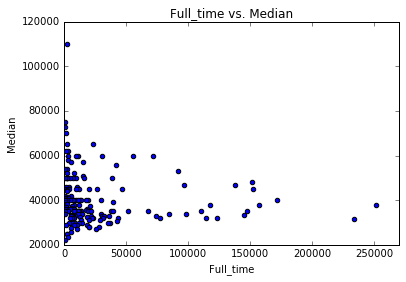

In [8]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Full_time vs. Median')
ax.set_xlim(0,270000)
ax.set_ylim(20000,120000)

(-0.0001, 0.2)

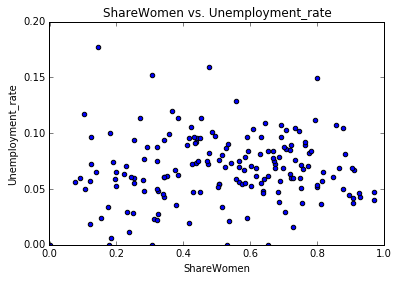

In [9]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('ShareWomen vs. Unemployment_rate')
ax.set_xlim(-0.0001,1)
ax.set_ylim(-0.0001, 0.2)

(20000, 120000)

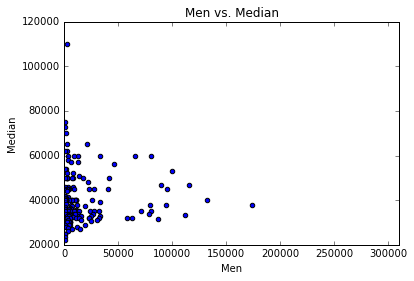

In [10]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Men vs. Median')
ax.set_xlim(0,310000)
ax.set_ylim(20000,120000)

(20000, 120000)

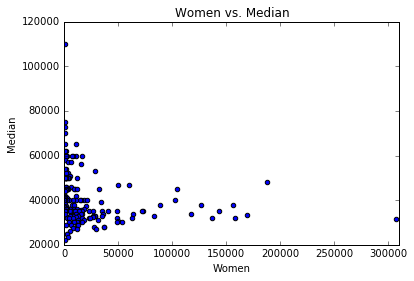

In [11]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Women vs. Median')
ax.set_xlim(0,310000)
ax.set_ylim(20000,120000)

We can now explore the questions further.

- Do students in more popular majors make more money?
 - _Sample_size vs. Median_ scatter plot shows that this does not seem to be related. There is no evident correlation shown (a further statistic exploration can determine this more exactly) and the higher Median values, ignoring the highest value, are shown for _Sample_size_ values under 1200.

- Do students that majored in subjects that were majority female make more money?
 - We can refer to the scatter plot _ShareWomen vs. Unemployment_rate_, that shows that values above 0.5 (majority of women) are not that different from the ones below 0.5 (majority of men). It seems that women share is independent from unemployment rate. We can also compare _Men vs. Median_ and _Women vs. Median_ plots to check the differences. x limits have been adjusted in order to compare them. There is a gap in women plot between 200 k and 300 k, but there is no significative differences shown.

- Is there any link between the number of full-time employees and median salary?
 - The scatter plot _Full_time vs. Median_ does not seem to show such a correlation to support this statement. Higher values of Median are shown in the lower levels of Full_time. Median value maintains below 60 k for most of the time.
 
## Histograms
Lets keep on analysing with another plot type: __histograms__.
We would like to explore:
- What percent of majors are predominantly male? Predominantly female?
- What's the most common median salary range?

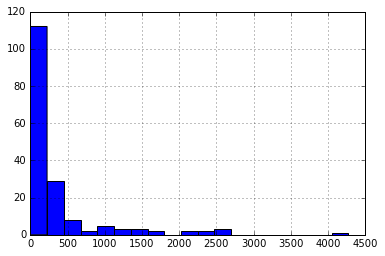

In [12]:
recent_grads['Sample_size'].hist(bins=20, range=(0,4500))

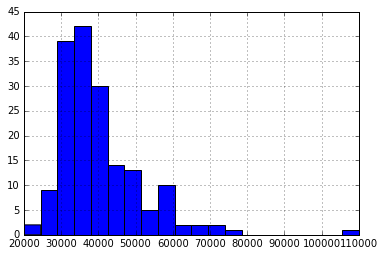

In [13]:
recent_grads['Median'].hist(bins=20, range=(20000,110000))

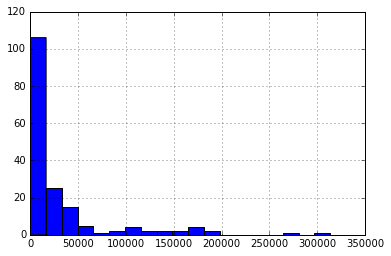

In [14]:
recent_grads['Employed'].hist(bins=20, range=(0,330000))

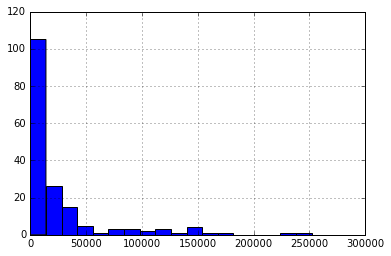

In [15]:
recent_grads['Full_time'].hist(bins=20, range=(0,280000))

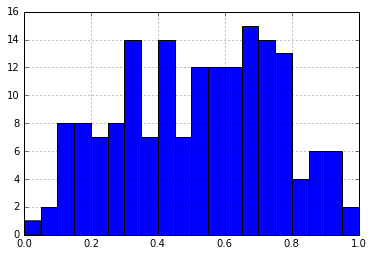

In [16]:
recent_grads['ShareWomen'].hist(bins=20, range=(0,1))

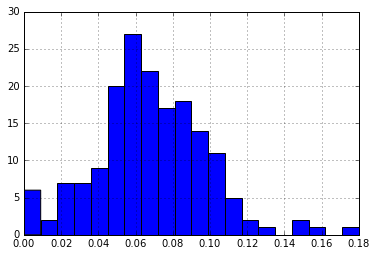

In [17]:
recent_grads['Unemployment_rate'].hist(bins=20, range=(0,0.18))

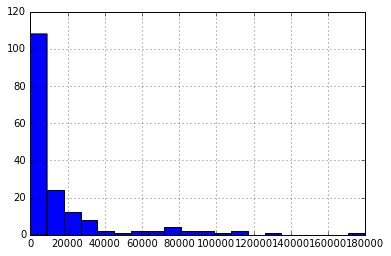

In [18]:
recent_grads['Men'].hist(bins=20, range=(0,180000))

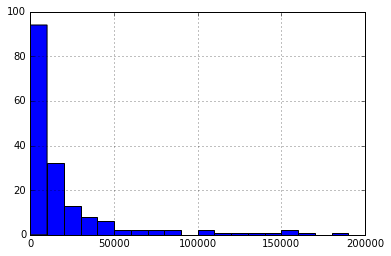

In [19]:
recent_grads['Women'].hist(bins=20, range=(0,200000))

Lets try to answer the questions:
- What percent of majors are predominantly male? Predominantly female?
 - While exploring the _ShareWomen_ histogram, we can see that above 0.5 (majority of women), the values seem higher than below 0.5 (majority of men). The most common ShareWomen value is about 0.7, with a frequency of 15, closely followed by 0.3, 0.4, 0.75 and 0.8. So we can infer that Women Share has its place in "the podium": most common value, the second and third.

- What's the most common median salary range?
 - _Median_ histogram shows that the distribution seems pretty normal, with an asymmetry from the right (values above the median of the distribution are higher than below). The central value ir between 30 and 40 k, with a frequency around 40 times. 40 k presents a frequency of 30 and then the other values of the distribution are kept below 15.

## Scatter Matrix
Lets further see relations by generating Scatter Matrix plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a75adf8d0>,
      dtype=object)

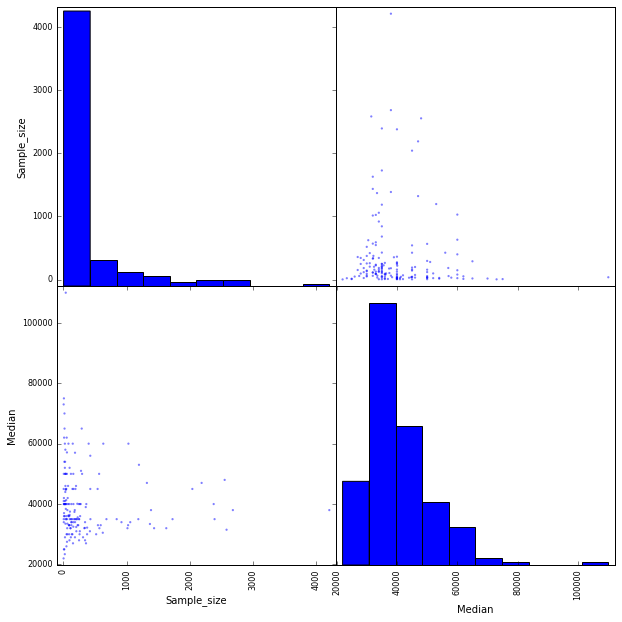

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a75992320>,
      dtype=object)

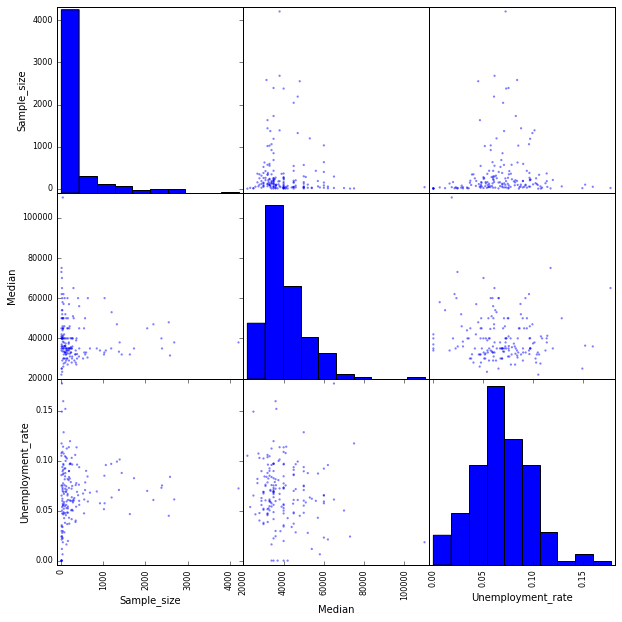

In [21]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

It seems that scatter matrix do not show improvements in visual correlation for this parameters.

## Bars
We can observe some bar plots to show more information to find a conclusion.

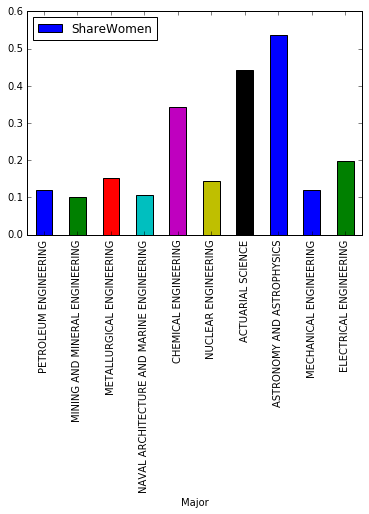

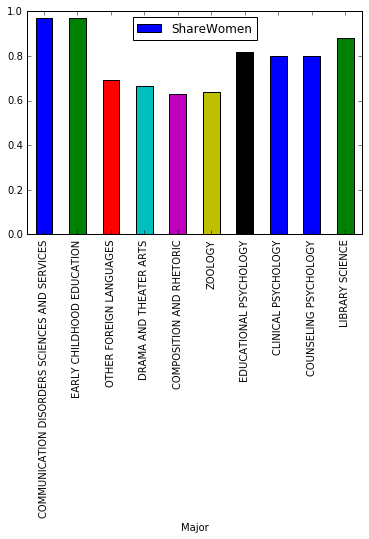

In [22]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

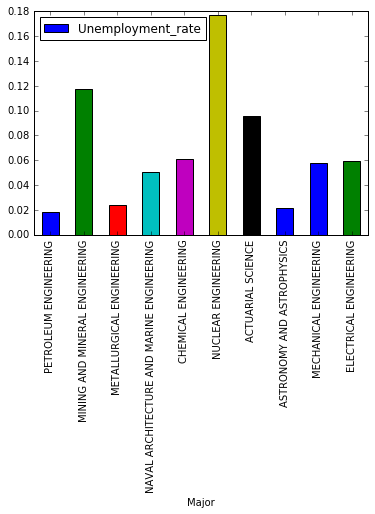

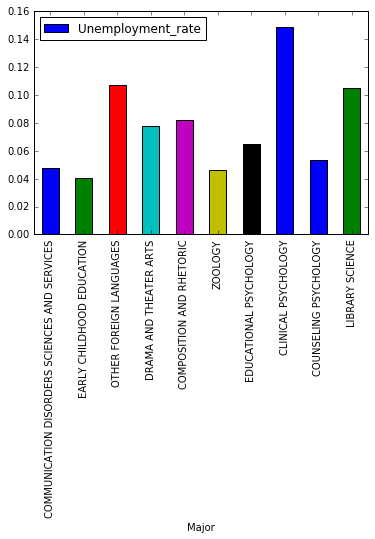

In [23]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

## Conslusions
From the first set of bars _ShareWomen_ we can see that women participation in top majors is low, while the bottom majors seem to share the women students. Unluckily, those are the majors with high unemployment rate, as _Clinical Psychology_, _Library Science_ and _Other Foreign Languages_.
Maybe this is another call for actions. Women should be encouraged to access to same majors as men do, in order to keep the unemployment rates lower, specially considering the salary gap between both genders.


__It is important to notice that there are no women-majors or men-majors; equality should be a priority in university.__